In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive') #구글 드라이브 접근

Mounted at /content/drive


# 데이터 분석 과정

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/데이터 과학/PBL/서울시 부동산 실거래가 정보(r).csv', encoding='cp949') #구글 드라이브의 경로명을 파악해서 넣어야함.
data.head()

<ipython-input-2-f8e361c78d71>:3: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/데이터 과학/PBL/서울시 부동산 실거래가 정보(r).csv', encoding='cp949') #구글 드라이브의 경로명을 파악해서 넣어야함.


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11530,구로구,10600,고척동,1,대지,306,0,경남2,...,53000,70.980,0.0,5,NaN,NaN,1999,아파트,중개거래,서울 구로구
1,2024,11530,구로구,10600,고척동,1,대지,306,0,경남2,...,53000,70.980,0.0,5,NaN,20241115.0,1999,아파트,중개거래,서울 구로구
2,2024,11530,구로구,10200,구로동,1,대지,104,9,성호메이플라워멤버스빌,...,15000,31.750,0.0,6,NaN,NaN,2002,아파트,중개거래,서울 구로구
3,2024,11530,구로구,10900,궁동,1,대지,290,0,우남푸르미아,...,63000,84.958,0.0,7,NaN,NaN,2007,아파트,중개거래,서울 구로구
4,2024,11530,구로구,10200,구로동,1,대지,1280,0,한신휴플러스(1280-0),...,60500,50.030,0.0,9,NaN,NaN,2007,아파트,중개거래,서울 구로구


# 데이터 전처리 과정

In [3]:
# 필요한 열 선택
columns = ['물건금액(만원)', '건물면적(㎡)', '층', '건축년도', '법정동명']
data_selected = data[columns]

# 법정동명이 '오류동', '온수동'인 데이터만 필터링
filtered_data = data_selected[data_selected['법정동명'].isin(['오류동', '온수동'])].copy()

# 결측값 처리
data_cleaned = filtered_data.dropna(subset=['층', '건축년도', '법정동명']).copy()
data_cleaned = data_cleaned[data_cleaned['건축년도'] >= 1900].copy() # 건축년도 필터링 (1900년 이상)

# 파생 변수 생성
data_cleaned['연식'] = 2024 - data_cleaned['건축년도']  # 건축 연도 기준 현재 연도까지의 경과 연수

# 로그 변환 적용 (종속 변수)
data_cleaned['물건금액_log'] = np.log1p(data_cleaned['물건금액(만원)'])

# 학습 데이터에서 법정동명 제거
data_for_model = data_cleaned.drop(columns=['법정동명'])

# 데이터 확인
print('데이터셋 크기 : ', data_for_model.shape)
data_for_model.head()

데이터셋 크기 :  (17306, 6)


,물건금액(만원),건물면적(㎡),층,건축년도,연식,물건금액_log
9,23800,59.160,1,1998,26,10.077483
10,9700,30.030,8,2001,23,9.179984
11,21000,43.315,3,2012,12,9.952325
12,21000,43.155,4,2012,12,9.952325
21,21500,43.155,3,2012,12,9.975855


# 데이터 전처리 과정[NULL/결측값 존재 여부 확인]

In [ ]:
print(data_cleaned['물건금액(만원)'].describe())
print(data_cleaned['물건금액(만원)'].value_counts().sort_index())

count     17306.000000
mean      25437.930371
std       14044.026316
min        1500.000000
25%       15000.000000
50%       23000.000000
75%       32700.000000
max      157000.000000
Name: 물건금액(만원), dtype: float64
물건금액(만원)
1500      1
2000      1
3000      2
3400      1
3450      1
         ..
100000    5
101000    1
105000    1
115000    1
157000    1
Name: count, Length: 1440, dtype: int64


In [ ]:
print(data_cleaned['연식'].describe())
print(data_cleaned['연식'].value_counts().sort_index())

count    17306.000000
mean        21.680631
std          9.728810
min          1.000000
25%         15.000000
50%         21.000000
75%         26.000000
max         53.000000
Name: 연식, dtype: float64
연식
1       14
2      302
3      263
4      262
5      192
6      157
7       92
8      165
9      182
10     465
11     673
12     147
13     240
14    1045
15     296
16     127
17     513
18     298
19    1156
20    1411
21    1303
22    1578
23     340
24     126
25     231
26    1750
27      90
28     438
29     336
30      66
31     201
32     136
33     253
34      25
35     181
36     280
37     373
38     384
39     685
40     185
41      84
42      38
43      16
44       8
45      21
47       2
48     166
53      10
Name: count, dtype: int64


In [ ]:
print(data_cleaned['층'].describe())
print(data_cleaned['층'].value_counts().sort_index())

count    17306.000000
mean         5.917659
std          5.106152
min         -1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         25.000000
Name: 층, dtype: float64
층
-1      343
 1     1893
 2     2726
 3     2700
 4     1839
 5     1484
 6      856
 7      649
 8      544
 9      447
 10     507
 11     498
 12     412
 13     398
 14     435
 15     356
 16     306
 17     213
 18     216
 19     142
 20     132
 21      75
 22      75
 23      31
 24      23
 25       6
Name: count, dtype: int64


In [ ]:
print(data_cleaned['건물면적(㎡)'].describe())
print(data_cleaned['건물면적(㎡)'].value_counts().sort_index())

count    17306.000000
mean        59.239222
std         24.145600
min         12.240000
25%         41.592500
50%         59.730000
75%         75.870000
max        162.160000
Name: 건물면적(㎡), dtype: float64
건물면적(㎡)
12.24       6
12.94       3
13.04       2
13.69       5
14.06     104
         ... 
137.92     13
142.05     11
158.88      2
162.03     33
162.16     15
Name: count, Length: 1402, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# 독립 변수와 종속 변수 설정
X = data_for_model.drop(['물건금액(만원)', '물건금액_log'], axis=1)
y = data_for_model['물건금액_log']  # 로그 변환된 종속 변수

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터셋 분리 (train_size=0.7로 훈련 데이터 크기를 줄임)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                        test_size=0.3, train_size=0.7, random_state=42)

# 랜덤 포레스트 하이퍼파라미터 최적화
param_dist = {
    'n_estimators': [100, 200],  # 트리 수 줄임
    'max_depth': [10, 15],  # 최대 깊이
    'min_samples_split': [2, 5],  # 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2],  # 리프에 필요한 최소 샘플 수
    'max_features': ['sqrt']  # 더 작은 범위 탐색
}

# 랜덤 포레스트 모델 생성
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV 설정 (n_iter=10으로 탐색 시간 단축)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3,
                           scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# 최적 모델로 학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 데이터 원본 값 복원 (역변환)
X_test_orig = scaler.inverse_transform(X_test)  # 역변환
X_test_orig_df = pd.DataFrame(X_test_orig, columns=X.columns)  # 원본 데이터의 열 이름 매핑

# 예측 및 평가
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # 로그 변환 복원
y_test_orig = np.expm1(y_test)  # 로그 변환 복원

# 평가 지표 계산
mse = mean_squared_error(y_test_orig, y_pred)
mape = mean_absolute_percentage_error(y_test_orig, y_pred) * 100
r2 = r2_score(y_test_orig, y_pred)

# 결과 출력
print(f'Mean squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'MAPE (오차 비율): {mape:.2f}%')

Mean squared Error: 61315093.66
R^2 Score: 0.68
MAPE (오차 비율): 18.53%


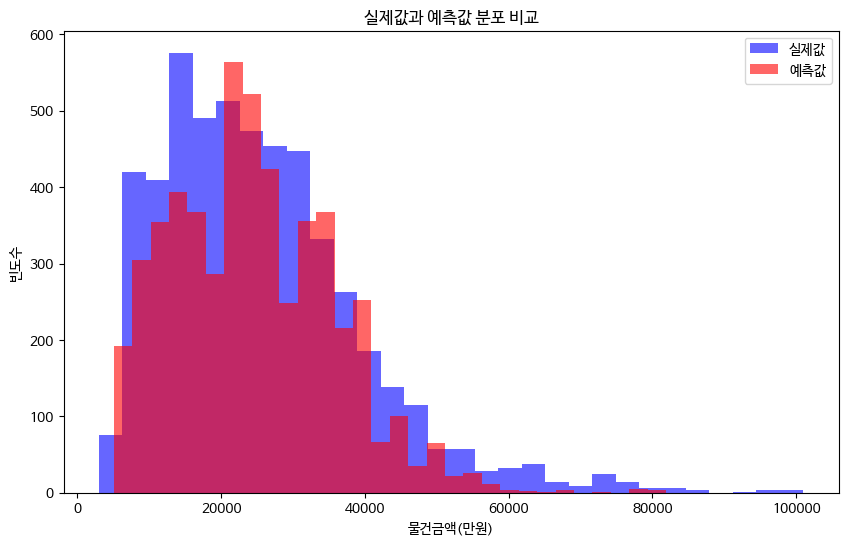

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
# 실제값과 예측값 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(y_test_orig, bins=30, color='blue', alpha=0.6, label='실제값')
plt.hist(y_pred, bins=30, color='red', alpha=0.6, label='예측값')
plt.xlabel("물건금액(만원)")
plt.ylabel("빈도수")
plt.legend()
plt.title("실제값과 예측값 분포 비교")
plt.show()


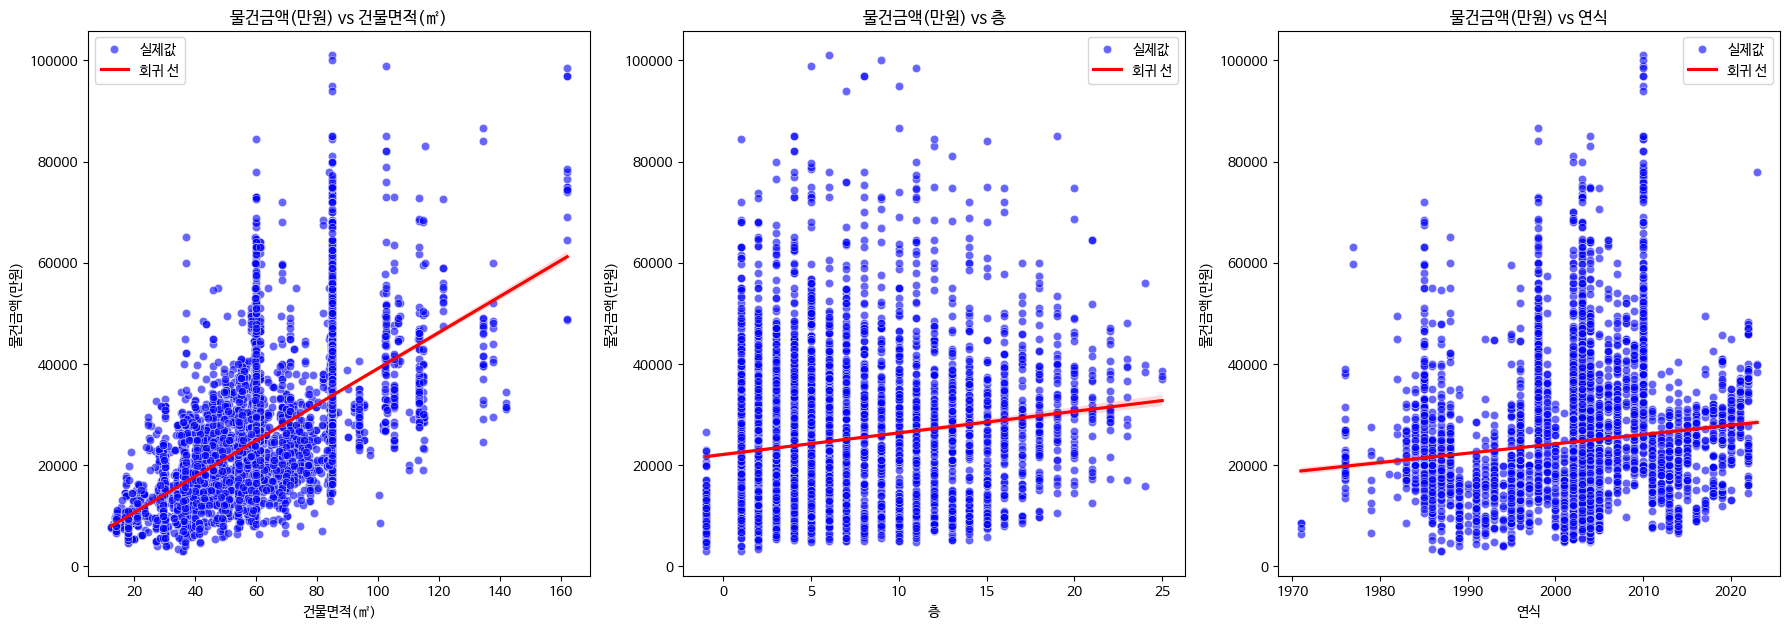

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 예측된 값과 실제 값의 산점도를 각 특성에 대해 그리기
features = ['건물면적(㎡)', '층', '연식']  # x_feature

plt.figure(figsize=(18, 12))

# 각 피처별로 그래프 그리기
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)  # 2행 3열의 서브플롯

    # 산점도 그리기
    sns.scatterplot(x=X_test_orig[:, i], y=y_test_orig, color='blue', label='실제값', alpha=0.6)
    #sns.scatterplot(x=X_test_orig[:, i], y=y_pred, color='red', label='예측값', alpha=0.6)

    # 선형 회귀선 그리기
    sns.regplot(x=X_test_orig [:, i], y=y_pred, scatter=False, color='red', label='회귀 선')

    plt.title(f'물건금액(만원) vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('물건금액(만원)')
    plt.legend()

plt.tight_layout()  # 레이아웃 정리
plt.show()


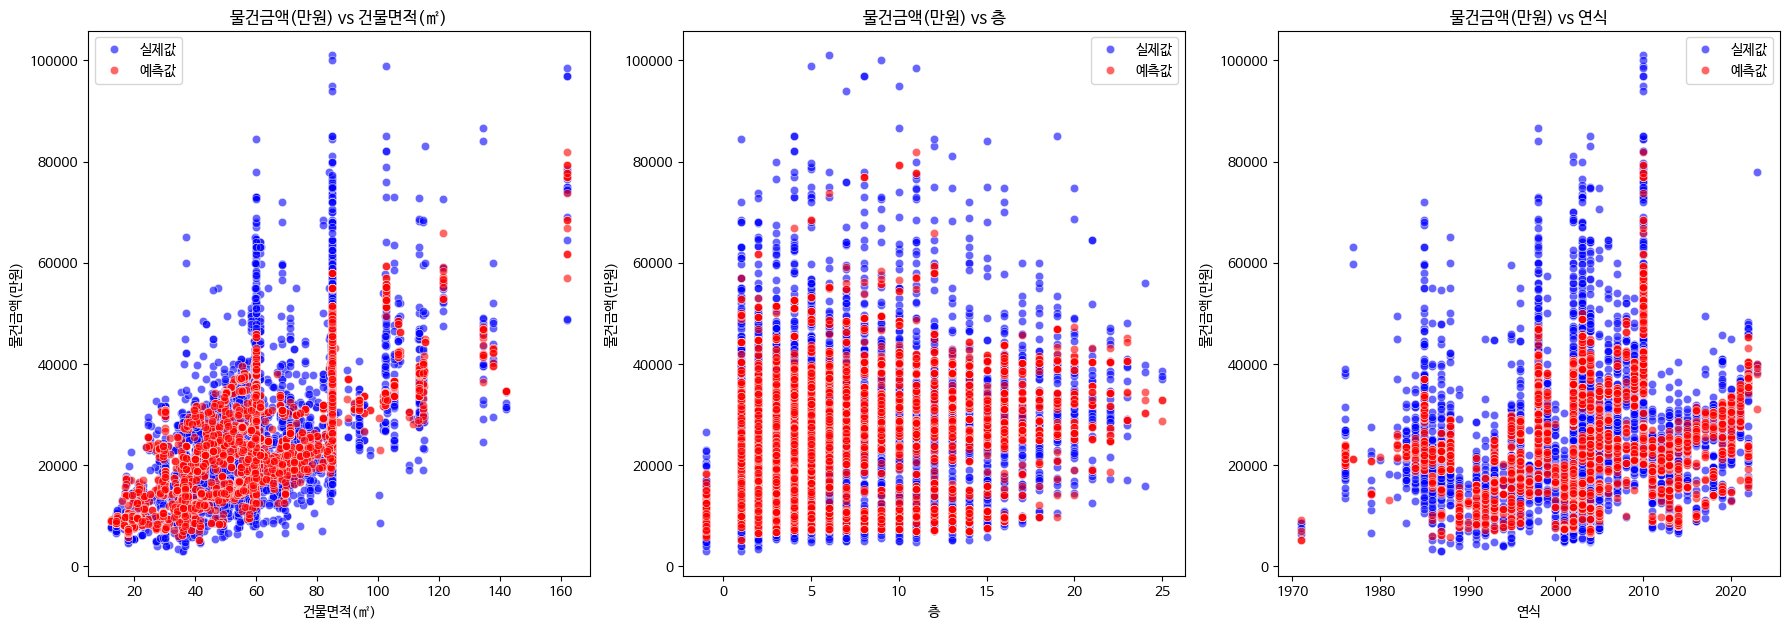

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 예측된 값과 실제 값의 산점도를 각 특성에 대해 그리기
features = ['건물면적(㎡)', '층', '연식']  # x_feature

plt.figure(figsize=(18, 12))

# 각 피처별로 그래프 그리기
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)  # 2행 3열의 서브플롯

    # 산점도 그리기
    sns.scatterplot(x=X_test_orig[:, i], y=y_test_orig, color='blue', label='실제값', alpha=0.6)
    sns.scatterplot(x=X_test_orig[:, i], y=y_pred, color='red', label='예측값', alpha=0.6)

    # 선형 회귀선 그리기
    #sns.regplot(x=X_test_orig [:, i], y=y_pred, scatter=False, color='green', label='회귀 선')

    plt.title(f'물건금액(만원) vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('물건금액(만원)')
    plt.legend()

plt.tight_layout()  # 레이아웃 정리
plt.show()


In [ ]:
print("건물 가격을 예측하고 싶은 건물의 정보를 입력해주세요.")

floor = int(input("층수 : "))
area_size = int(input("건물 면적(㎡) : "))
year = int(input("건축년도 : "))

건물 가격을 예측하고 싶은 건물의 정보를 입력해주세요.
층수 : 3
건물 면적(㎡) : 70
건축년도 : 2018


In [ ]:
user_input = [[area_size, floor, year, 0]]  # '연수'는 사용하지 않을것이므로 0으로 채움 (훈련 데이터에 맞춤)
# 스케일링 후 예측
user_input_scaled = scaler.transform(user_input)
building_predict_log = best_model.predict(user_input_scaled)  # 예측 (로그 변환된 값)
building_predict_price = np.expm1(building_predict_log)  # 로그 변환 복원

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(f"이 건물의 예상 가격은 {building_predict_price[0]:,.2f}만원 입니다.")

이 건물의 예상 가격은 34,060.39만원 입니다.
